In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pyproj import Transformer

# pyproj Transformer 객체 생성 (3857 좌표계 -> 4326 좌표계)
transformer = Transformer.from_crs(3857, 4326, always_xy=True)

def convert_coordinates(coord):
    # 빈 문자열인 경우 처리
    if not coord:
        return None

    try:
        # 좌표값을 파싱하여 x, y 좌표 추출
        x = int(coord[8:24], 16) / 10000000.0
        y = int(coord[24:40], 16) / 10000000.0

        # 좌표 변환
        lon, lat = transformer.transform(x, y)

        return lon, lat
    except ValueError:
        # 유효하지 않은 형식의 좌표값인 경우 처리
        return None

data = pd.read_csv('D:\\장우영\\LOCALSEARCH\\DA\\DA\\data\\FAmerge_20230518_124958.csv', encoding='ANSI')

# 좌표 변환 적용 및 데이터프레임 업데이트
data['geom'] = data['geom'].apply(convert_coordinates)

# 변환된 좌표값 출력 또는 원하는 작업 수행

# 데이터프레임에서 '경도'와 '위도' 열로 분리하여 저장
data['경도'] = data['geom'].apply(lambda x: x[0] if x is not None else None)
data['위도'] = data['geom'].apply(lambda x: x[1] if x is not None else None)


# Convert "insert_time" to numeric representation
data['insert_time'] = pd.to_datetime(data['insert_time']).astype('int64') // 10**9

X = data[["mmsi", "ship_type", "경도", "위도", "cog", "sog", "insert_time", "풍향", "유향", "기온", "수온", "풍속", "유속", "기압", "습도"]]
y = data[["경도", "위도"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 4.4544686963212055e-29


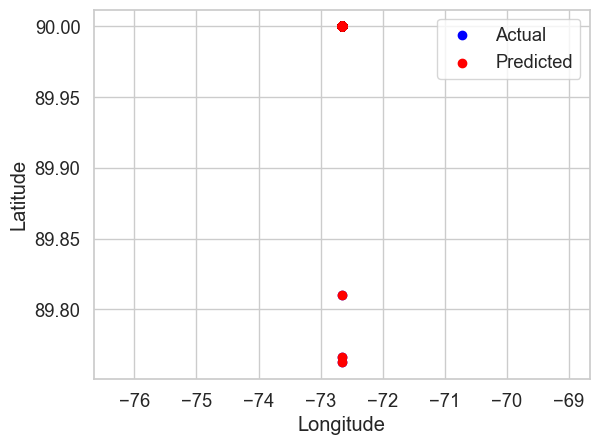

In [138]:
import matplotlib.pyplot as plt

# 테스트 데이터의 실제 좌표값
test_coordinates = y_test.values

# 예측 결과 좌표값
predicted_coordinates = y_pred

# 실제 좌표값과 예측 결과 좌표값의 경도와 위도 추출
test_longitude = test_coordinates[:, 0]
test_latitude = test_coordinates[:, 1]
predicted_longitude = predicted_coordinates[:, 0]
predicted_latitude = predicted_coordinates[:, 1]

# 실제 좌표값과 예측 결과 좌표값을 산점도로 표시
plt.scatter(test_longitude, test_latitude, color='blue', label='Actual')
plt.scatter(predicted_longitude, predicted_latitude, color='red', label='Predicted')

# 축 레이블과 범례 추가
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
#위의 코드는 다음과 같은 작업을 수행

#pandas, sklearn 및 pyproj 라이브러리를 가져옵니다.
#3857 좌표계에서 4326 좌표계로 좌표를 변환하기 위해 pyproj의 Transformer 객체를 생성합니다.
#convert_coordinates 함수를 정의합니다. 이 함수는 입력된 좌표를 3857 좌표계에서 4326 좌표계로 변환합니다.
#CSV 파일을 pandas의 read_csv 함수를 사용하여 읽어옵니다.
#좌표 변환을 적용하기 위해 geom 열에 convert_coordinates 함수를 적용합니다.
#변환된 좌표를 경도와 위도 열로 분리하여 데이터프레임에 저장합니다.
#'insert_time' 열의 날짜 및 시간 값을 숫자로 변환합니다.
#예측 변수(X)와 타깃 변수(y)를 설정합니다.
#train_test_split 함수를 사용하여 데이터를 학습 및 테스트 세트로 분할합니다.
#LinearRegression 모델을 생성하고 학습 데이터를 사용하여 모델을 훈련시킵니다.
#테스트 데이터를 사용하여 예측을 수행하고, 예측 결과와 실제 값 간의 평균 제곱 오차(MSE)를 계산합니다.
#MSE 값을 출력합니다.
#이 코드는 주어진 CSV 파일에서 좌표 값을 읽어와 3857 좌표계에서 4326 좌표계로 변환하고, 변환된 좌표와 다른 변수들 간의 선형 회귀 모델을 학습하여 예측을 수행합니다. 이를 통해 모델의 예측 성능을 평가할 수 있는 MSE 값을 계산하고 출력합니다.